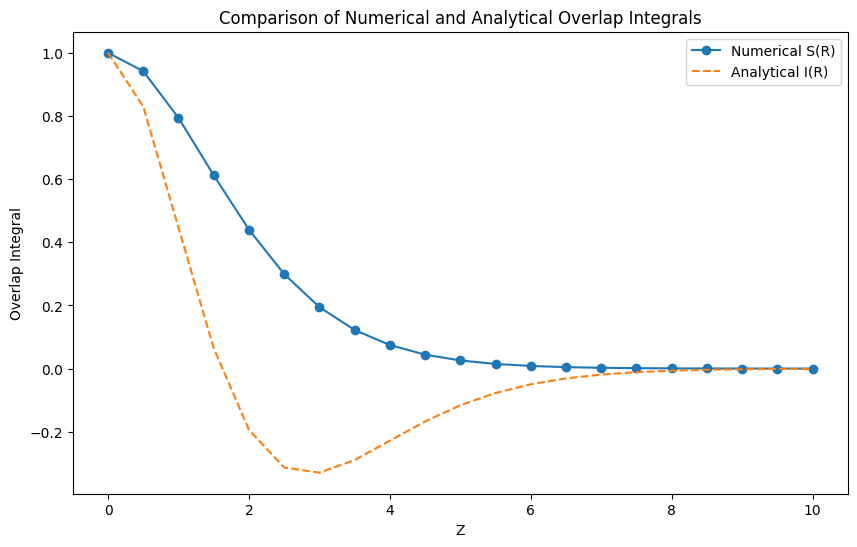

In [3]:
import numpy as np
from scipy.integrate import nquad
import matplotlib.pyplot as plt

# Constants
zeta = 1.5679  # Atomic unit for carbon
increment = 0.5
Z_range = np.arange(0, 10.5, increment)  # Z values from 0 to 10 with step 0.5

# Slater-type orbital function for 2pz
def psi_2pz(r, zeta=zeta):
    """Slater-type orbital for the 2pz orbital."""
    x, y, z = r
    R = np.sqrt(x**2 + y**2 + z**2)
    return np.sqrt(zeta**5 / np.pi) * z * np.exp(-zeta * R)

# Overlap integral function for two atoms at -R/2 and R/2
def integrand(x, y, z, Z):
    """Integrand for overlap integral."""
    r1 = (x + Z / 2, y, z)
    r2 = (x - Z / 2, y, z)
    return psi_2pz(r1) * psi_2pz(r2)

def numerical_overlap_integral(Z):
    """Compute the numerical overlap integral S(R) for a given Z."""
    result, error = nquad(integrand, [[-10, 10], [-10, 10], [-10, 10]], args=(Z,))
    return result

# Analytical formula for the overlap integral I(R)
def analytical_overlap_integral(Z):
    """Calculate the analytical formula I(R) for the overlap integral."""
    R = Z
    term1 = (zeta**3 * R**3 + 6 * zeta**2 * R**2 + 15 * zeta * R + 15)
    term2 = zeta**2 * Z**2 * (zeta**2 * R**2 + 3 * zeta * R + 3)
    return np.exp(-zeta * R) / 15 * (term1 - term2)

# Calculate values for S(R) and I(R)
numerical_results = [numerical_overlap_integral(Z) for Z in Z_range]
analytical_results = [analytical_overlap_integral(Z) for Z in Z_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(Z_range, numerical_results, label="Numerical S(R)", marker='o')
plt.plot(Z_range, analytical_results, label="Analytical I(R)", linestyle='--')
plt.xlabel("Z")
plt.ylabel("Overlap Integral")
plt.legend()
plt.title("Comparison of Numerical and Analytical Overlap Integrals")
plt.show()
